
<h1 align=center> Calculus: Multivariate Systems</h1>



This course is developed by Dr. Mohamed Gabr (gbrbreen2@gmail.com) as an introduction to mathematics for AI. The course focuses on using Python for Calculus using Sympy.

# Partial derivative

A partial derivative of a function of several variables is its derivative with respect to one of those variables, with the others held constant (as opposed to the total derivative, in which all variables are allowed to vary). Partial derivatives are used in vector calculus.

In [1]:
from sympy import *
f=Symbol('f')
x= Symbol('x')
y=Symbol('y')
init_printing()

f=x**2*y

# let us find the derivative with respect to x (how the function result changes as we shift around x while y is constant)
print(diff(f,x))

# let us say that x=1 and y=2 ==> we find f(1,2)
diff(f,x).subs(x,1)

2*x*y


In [2]:
# let us find the derivative with respect to y (how the fnction result  changes as we shift around y while x is constant)
print(diff(f,y))

# let us say that x=1 and y=2 ==> we find f(1,2)
diff(f,y).subs(y,2)
diff(f,y)

x**2


# Total derivative and the multivariate chain rule

In [3]:
#https://www.math.hmc.edu/calculus/tutorials/multichainrule/

# Let f=x2y−y2 where x and y are parametrized as x=t**2 and y=2t.
f=Symbol('f')
x= Symbol('x')
y=Symbol('y')
t=Symbol('t')



f=x**2*y-y**2

# get the derivative of f with respect to x
dfOndx=diff(f,x)
print(diff(f,x))

# get the derivative of f with respect to y
dfOndy=diff(f,y)
print(diff(f,y))



# define the relation between x and t & between y and t
x=t**2
y=2*t

dxOndt=diff(x,t)
dyOndt=diff(y,t)

print(dxOndt)
print(dyOndt)

f=x**2*y-y**2 # note that we should put the big function near the differentiation to get the correct result
#get derivative of f with respect to t
diff(f,t)

2*x*y
x**2 - 2*y
2*t
2


In [4]:
# ِAnother solution using the chain rule for multivariate  حل آخر يدوي يدوي يدوي باستخدام قاعدة السلسلة
# the rule is here: https://www.math.hmc.edu/calculus/tutorials/multichainrule/

# dfOndx.dot(dxOndt)+dfOndy.dot(dyOndt)
# بعد ذلك يتم التعويض عن كل من 
# x and y using ==> t

In [5]:
# يمكننا عمل كل الخطوات السابقة في خطوة واحدة بالتعويض من دالة في الأخرى من البدابة
# f represented by t ==> f=(t**2)**2*(2*t)-(2*t)**2
print(diff(f,t))# you may  put the function as a whole not as a symbol ==> (t**2)**2*(2*t)-(2*t)**2... to avoid having the result as 0
diff((t**2)**2*(2*t)-(2*t)**2,t)

10*t**4 - 8*t


In [6]:
# get the same results using subs
f=Symbol('f')
x= Symbol('x')
y=Symbol('y')
t=Symbol('t')



f=x**2*y-y**2
print(f)
diff(f.subs([(x,t**2), (y,2*t)]),t)

x**2*y - y**2


# The Jacobian

To understand the Jacobian, we need to understand plotting well. So, we will explain how to plot first

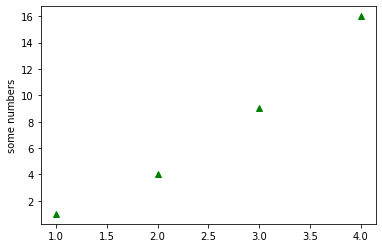

In [8]:
# this is how to plot points
from matplotlib import *
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'g^') # the first list is Xs and the second list is Ys
plt.ylabel('some numbers')
plt.show()

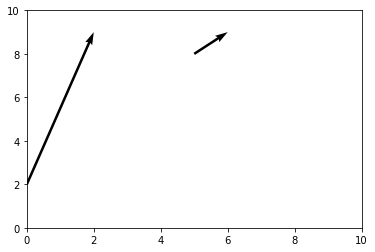

In [9]:
# this is how to plot vectors
# here we are plotting 2 vectors. So, we define the Xs then the Ys of the starting points of them [5, 0], [8, 9,]. So, the start 
# point of the first is (5,8) and the start point  of the second is (0,2). Then we define the Xs and the Ys for each vector 
# [1, 2], [1, 7]. So, the end point of the first vector is (1,1) and the second vector is (2,7). 
plt.quiver([5, 0], [8, 2], [1, 2], [1, 7], angles='xy', scale_units='xy', scale=1)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

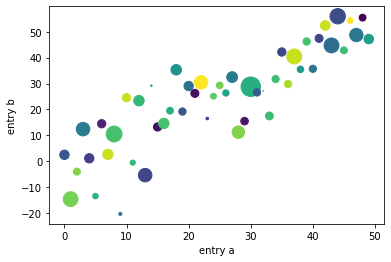

In [11]:
import numpy as np
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

We're going to introduce the Jacobian, which brings in some of the ideas from linear algebra to build these partial derivatives into something particularly useful. The concept of the Jacobian can be applied to a variety of different problems. But in the context of getting started with optimisation and machine learning, there is a particular scenario that comes up a lot, which is the Jacobian of a single function of many variables.

In short, if you have a function of many variables so  f(x1, x2, x3, ...) then the Jacobian is simply a vector where each entry is the partial derivative of f with respect to each one of those variables in turn. By convention, we write this as a row vector rather than a column vector

To build the Jacobian, we just find each of the partial derivatives of the function one by one. So, the vector is a collection of derivatives/ differentials/ rates of change for the original function with respect to the variables x,y,z

In [12]:
# here we will build a function f(x,y,z)=x**2*y+3*z and get each of the partial derivatives
from sympy import *
from sympy.plotting import plot3d

f=Symbol('f')
x= Symbol('x')
y=Symbol('y')
z=Symbol('z')
init_printing()
f=x**2*y+3*z
print(diff(f,x))
print(diff(f,y))
print(diff(f,z))

# Now we build the Jcobian vector.... we can build it using Sympy Or Numpy
jacobianVector=Matrix([diff(f,x),diff(f,y),diff(f,z)])# we use the jacobian vector as a row vector. So, we should transpose it before usage
print(jacobianVector)


#jacobianPlot=plot3d(jacobianVector.subs((x,1),(y,2)), (x, -5, 5), (y, -5, 5))

2*x*y
x**2
3
Matrix([[2*x*y], [x**2], [3]])


We now have an algebraic expression for a vector which when we give it a specific  x, y, z coordinate, will return a vector pointing in the direction of steepest uphill slope of this function. The vector for this particular function has a constant contribution in the z direction which does not depend on the location selected. For example, at the point (0, 0, 0),  we can see that our Jacobian is just going to be J(0, 0, 0) is just going to be well, (0, 0, 3) over here. So we can see that our Jacobian is a vector of length 3 pointing directly in the z direction. So, we know the magnitude and the direction.

In [14]:
jacobianVector.subs([(x,0), (y,0), (z,0)])

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣3⎦

The Jacobian is simply a vector that we can calculate for each location on this plot which points in the direction of the steepest uphill slope. Furthermore, the steeper the slope, the greater the magnitude of Jacobian at that point. 

In [16]:
# Another example of the Jacobian
from sympy import *
from sympy.parsing.sympy_parser import parse_expr

f=Symbol('f')
x= Symbol('x')
y=Symbol('y')
f=x**2*y+3*x*y+y**2*x

jacobianVector=Matrix([diff(f,x),diff(f,y)])# # we use the jacobian vector as a row vector. So, we should transpose it before usage
print(jacobianVector)
print(jacobianVector.subs([(x,1), (y,2)]))# Note the difference between subs when used in matrices and when used in functions
print(jacobianVector[0])
print(jacobianVector[1])

vectorXcoord=jacobianVector[0].subs([(x, 1), (y, 2)])
vectorYcoord=jacobianVector[1].subs([(x, 1), (y, 2)])
print([vectorXcoord])# Note the difference between subs when used in matrices and when used in functions
print([vectorYcoord])# Note the difference between subs when used in matrices and when used in functions

jacobianVector.subs([(x,1), (y,2)])

Matrix([[2*x*y + y**2 + 3*y], [x**2 + 2*x*y + 3*x]])
Matrix([[14], [8]])
2*x*y + y**2 + 3*y
x**2 + 2*x*y + 3*x
[14]
[8]


⎡14⎤
⎢  ⎥
⎣8 ⎦

# Jacobian Applied

We're going to extend the concept of the Jacobian, from vectors up to matrices, which will allow us to describe the rates of change of a vector valued function. 

So, we're now going to do the reverse of our approach from the last time and start by looking at the vector field in the Jacobians, then see if we can understand how the function must look.

In [18]:
from sympy import *

f=Symbol('f')
x= Symbol('x')
y=Symbol('y')
f=2**(x**2+y**2)
jacobianVector=Matrix([diff(f,x),diff(f,y)])# we use the jacobian vector as a row vector. So, we should transpose it before usage
print(jacobianVector)

Matrix([[2*2**(x**2 + y**2)*x*log(2)], [2*2**(x**2 + y**2)*y*log(2)]])


In [19]:
# let us find the Jacobian for some specific points (-1,1) & (2,2) & (0,0)
from sympy import *
from mpmath import *
mp.dps = 15; mp.pretty = True
print(log(2))

jacobianVector.subs([(x,-1), (y,1)])

0.693147180559945


⎡-8⋅log(2)⎤
⎢         ⎥
⎣8⋅log(2) ⎦

In [20]:
jacobianVector.subs([(x,2), (y,2)])

⎡1024⋅log(2)⎤
⎢           ⎥
⎣1024⋅log(2)⎦

let's look at what's going on at the origin itself. Subbing in the point zero zero returns the zero vector, suggesting that the function is flat at this point, which must mean one of three things. Either, this point is a maximum, minimum, or something called a saddle, which we'll cover later in this module.

In [22]:
jacobianVector.subs([(x,0), (y,0)])

⎡0⎤
⎢ ⎥
⎣0⎦

Next, we're going to build a Jacobian matrix which describes functions that take a vector as an input, but unlike our previous examples, also give a vector as the output. If we consider the two functions: u=x-2y & v=3y-2x we can think of these as two vector spaces, one containing vectors with coordinates in u v and the other with coordinates in x and y. Each point in x y has a corresponding location in u v. So, as we move around x y space, we would expect our corresponding path in u v space to be quite different and so it is.

Let us the Jacobian transformation matrix  (The matrix that transforms from xy space to uv space)

In [25]:
from sympy import *


x= Symbol('x')
y=Symbol('y')
u=Symbol('u')
v=Symbol('v')
init_printing()
u=x-2*y
v=3*y-2*x
jacobianMatrix=Matrix([[diff(u,x),diff(u,y)], [diff(v,x),diff(v,y)]])
print(jacobianMatrix)#  this matrix is just the linear transformation from xy space to uv space.

Matrix([[1, -2], [-2, 3]])


So if we have a vector (x,y) = (2,3) and we want to make the calculations

In [27]:
vectorA=Matrix([2,3])

jacobianMatrix*vectorA

⎡-4⎤
⎢  ⎥
⎣5 ⎦

In [28]:
# converting Sympy array to numpy array
import numpy as np
JacobianArray=np.array(np.array(jacobianMatrix).astype(np.float64)).astype(np.float64)
VectorA_Array=np.array(np.array(vectorA).astype(np.float64)).astype(np.float64)
#np.matmul(JacobianArray,VectorA_Array)
JacobianArray.dot(VectorA_Array)

array([[-4.],
       [ 5.]])

In [29]:
# Another Jacobian Example for u(x,y)=x**2−y**2 and v(x,y) = 2xy
from sympy import *


x= Symbol('x')
y=Symbol('y')
u=Symbol('u')
v=Symbol('v')
init_printing()

u=x**2-y**2
v=2*x*y

jacobianMatrix=Matrix([[diff(u,x),diff(u,y)], [diff(v,x),diff(v,y)]])
print(jacobianMatrix)

Matrix([[2*x, -2*y], [2*y, 2*x]])


# Sandpit

In everyday language, we use the word optimisation to describe the process of trying to make something as good as it can be. 

In mathematics, optimisation basically means the same thing, as much of the research is dedicated to finding the input values to functions, which correspond to either a maximum or a minimum of a system. Examples of mathematical optimisation in action in the real world include the planning of routes through busy cities, the scheduling of production in a factory, or a strategyfor selecting stocks when trading. If we go back to the simplest function we saw in the last section, and we said that we wanted to find the location of the maximum, we can simply solve this system analytically by first building the Jacobian. 

And then finding the values of x and y which make it equal to 0. However, when the function gets a bit more complicated, finding the maximum or minimum can get a bit tricky. If as in this case, we still have an analytical expression, then we can at least still find the general expression for the Jacobian. But now simply setting it to 0 is not only much more complicated but it also is not enough as this function has multiple locations with zero gradient. 

In the following exercises, you're going to try to find the deepest point of a sandpit by measuring the depth of various points using a long stick. This is a very deep sandpit, so once you push the stick down to the bottom, there's no way to move it around sideways. You just have pull it out and try somewhere else. Also crucially, just like our nightwalking scenario ,
 وهي عندما تسير في منطقة جبلية ليلا وتريد الوصول لأعلى نقطة 
  you will have no idea what the peaks and troughs looks like at the bottom of the pit because you can't see, the sand is in the way. As you work through the exercise, I'm hoping that you will start to pick up on a few of the subtleties of optimisation. And hopefully, leave you with a few new questions as well, see you next time and have fun in the sandpit.

https://github.com/AdityaGupta030697/Mathematics-for-Machine-Learning/blob/master/sandpit.ipynb

https://github.com/AdityaGupta030697/Mathematics-for-Machine-Learning/blob/master/sandpit2.ipynb

# Hessian

In many ways, the Hessian can be thought of as a simple extension of the Jacobian vector. For the Jacobian, we collected together all of the first order derivatives of a function into a vector. Now, we're going to collect all of the second order derivatives together into a matrix, which for a function of n variables, would look like this. However, this is one of those scenarios where using an abbreviated notation style comes in really handy. We saw in the previous module that we can just keep differentiating a function using the same method to find higher and higher order derivatives. Similarly for a partial derivative, if you want to find the second derivative with respect to x1 then x2, it's as simple as just differentiating with respect to x1, assuming all the other variables are constant, and then differentiating with respect to x2, again, assuming all the other variables are constant. As you can see from this general form, our Hessian matrix will be  an n by n square matrix, where n is the number of variables in our function f.

In [33]:
# we will use the function f(x,y,x)=x**2*y*z
from sympy import *


x= Symbol('x')
y=Symbol('y')
f=Symbol('f')
init_printing()
f=x**2*y*z
# first we get the Jacobian
jVector=Matrix([[diff(f,x),diff(f,y),diff(f,z)]])# we use the jacobian vector as a row vector. So, we should transpose it before usage
print(jVector)
Hessian=Matrix([[diff(jVector[0,0],x), diff(jVector[0,0],y),\
                 diff(jVector[0,1],z)],[diff(jVector[0,1],x), diff(jVector[0,1],y),diff(jVector[0,0],z)],\
               [diff(jVector[0,2],x), diff(jVector[0,2],y),diff(jVector[0,2],z)]])
print(Hessian)
# So one thing to notice here is that our Hessian matrix is symmetrical across the leading diagonal. So actually, once I'd 
# worked out the top right region, I could just have written these directly in for the bottom left region. This will always be 
# true if the function is continuous, meaning that it has no sudden step changes.

Matrix([[2*x*y*z, x**2*z, x**2*y]])
Matrix([[2*y*z, 2*x*z, x**2], [2*x*z, 0, 2*x*y], [2*x*y, x**2, 0]])


### Another example of Jacobian and Hessian

We can now simply pass our Hessian an xyz coordinate,  and it will return a matrix of numbers, which hopefully tells us something about that point in the space. In order to visualize this, we're going to have to drop down to two dimensions again. 
Consider the simple function f(x,y) = x **2 + y **2. Calculating the Jacobian and the Hessian are both fairly straightforward. 

In [36]:
from sympy import *


x= Symbol('x')
y=Symbol('y')
f=Symbol('f')
init_printing()
f=x**2+y**2

jacobianVector=Matrix([[diff(f,x),diff(f,y)]])# we use the jacobian vector as a row vector. So, we should transpose it before usage
print(jacobianVector)
Hessian1=Matrix([[diff(jacobianVector[0,0],x), diff(jacobianVector[0,0],y)],\
                 [diff(jacobianVector[0,1],x), diff(jacobianVector[0,1],y)]])
print(Hessian1)

Matrix([[2*x, 2*y]])
Matrix([[2, 0], [0, 2]])


In [37]:
# let us calculate the value of the Jacobian at (0,0)
jacobianVector.subs([(x,0), (y,0)])

[0  0]

In [38]:
# let us calculate the value of the hessian at (0,0)
Hessian1.subs([(x,0),(y,0)])

⎡2  0⎤
⎢    ⎥
⎣0  2⎦

In [39]:
# then we calculate the determinant of the Hessian using Sympy
Hessian1.det()

However, if you hadn't known what function we were dealing with and calculated the value of the Jacobian at the point (0,0), you'd have seen that the gradient vector was also 0. But how would you know whether this thing was a maximum or a minimum at that point? You could, of course, go and check some other point and see if it was above or below, but this isn't very robust. 

Instead, we can look at the Hessian, which in this simple case is no longer even a function of x or y. Its determinant is clearly just 2 times 2 minus 0 times 0, which is 4. The power of the Hessian is, 

____firstly, that if its determinant is positive, ===> we know we are dealing with either a maximum or a minimum. 

____Secondly, we then just look at the first term of the hessian matrix, which is sitting at the top left-hand corner of the Hessian. 

If this guy is also positive, ===> we know we've got a minimum, as in this particular case. 

Whereas, if it's negative, ====> we've got a maximum. 

____Lastly, slightly modifying our function (as in the below cell) to include a minus sign and recalculating our Jacobian and our Hessian, and our Hessian determinant, we now see the third interesting case. This time, our Hessian determinant is negative. ===>  So we know that we're not dealing with a maximum or a minimum. But clearly at this point, (0,0), the gradient is flat.

So what's going on? Well, if you look at the animation, what we've got here is a location with 0 gradient, but with slopes coming down towards it in one direction, but up towards it in the other. We call this kind of feature as saddle point, and they can also cause a lot of confusion when searching for a peak

In [41]:
# recalculation after changing the function
f=x**2-y**2

jacobianVector=Matrix([[diff(f,x),diff(f,y)]])
print(jacobianVector)
Hessian1=Matrix([[diff(jacobianVector[0,0],x), diff(jacobianVector[0,0],y)],\
                 [diff(jacobianVector[0,1],x), diff(jacobianVector[0,1],y)]])
print(Hessian1)
Hessian1.det()

Matrix([[2*x, -2*y]])
Matrix([[2, 0], [0, -2]])


We've discussed how to think about two dimensional functions as landscapes. And we've also seen that we can construct Jacobian vectors which tell us both the direction and the magnitude of the gradient at each point in space. Last part, we added one further tool to our toolbox, which allowed us to double check what kind of feature we were standing on, when we landed on a point with a 0 gradient. These concepts will all be very useful to develop your understanding of optimisation problems, and have also let you see why multivariate calculus is worth knowing.